In [912]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt




Read in first data set.

In [913]:
df1 = pd.read_csv('KYRC24_OVW_Teacher_Working_Conditions.csv')

print(df1.head())

   School Year  County Number County Name  District Number  District Name  \
0     20232024            NaN         NaN              999  All Districts   
1     20232024            NaN         NaN              999  All Districts   
2     20232024            NaN         NaN              999  All Districts   
3     20232024            1.0       ADAIR                1   Adair County   
4     20232024            1.0       ADAIR                1   Adair County   

   School Number  School Name  School Code  State School Id  NCES ID  CO-OP  \
0            NaN  All Schools       999000              NaN      NaN    909   
1            NaN  All Schools       999000              NaN      NaN    909   
2            NaN  All Schools       999000              NaN      NaN    909   
3            NaN  All Schools         1000              NaN      NaN    902   
4            NaN  All Schools         1000              NaN      NaN    902   

  CO-OP Code School Type             Impact Measure  Impact Va

In [914]:
df1.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   School Year      4305 non-null   int64  
 1   County Number    4302 non-null   float64
 2   County Name      4302 non-null   object 
 3   District Number  4305 non-null   int64  
 4   District Name    4305 non-null   object 
 5   School Number    3789 non-null   float64
 6   School Name      4305 non-null   object 
 7   School Code      4305 non-null   int64  
 8   State School Id  3789 non-null   float64
 9   NCES ID          3789 non-null   float64
 10  CO-OP            4305 non-null   int64  
 11  CO-OP Code       4146 non-null   object 
 12  School Type      3789 non-null   object 
 13  Impact Measure   4305 non-null   object 
 14  Impact Value     4305 non-null   int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 504.6+ KB


In [915]:
df1.describe(
)

,School Year,County Number,District Number,School Number,School Code,State School Id,NCES ID,CO-OP,Impact Value
count,4305.0,4302.000000,4305.000000,3789.000000,4305.000000,3.789000e+03,3.789000e+03,4305.000000,4305.000000
mean,20232024.0,56.334728,302.751916,112.679335,302851.089895,5.658186e+07,2.102775e+11,904.820906,67.134030
std,0.0,32.310291,189.631225,155.949339,189646.446611,3.212147e+07,1.674417e+08,2.835275,16.995624
min,20232024.0,1.000000,1.000000,2.000000,1000.000000,1.001010e+06,2.100030e+11,901.000000,0.000000
25%,20232024.0,34.000000,156.000000,21.000000,156010.000000,3.416504e+07,2.101350e+11,902.000000,56.000000
50%,20232024.0,56.000000,275.000000,60.000000,275129.000000,5.627506e+07,2.102990e+11,905.000000,69.000000
75%,20232024.0,80.000000,461.000000,130.000000,461090.000000,7.947608e+07,2.104050e+11,907.000000,80.000000
max,20232024.0,120.000000,999.000000,980.000000,999000.000000,1.206011e+08,2.106000e+11,909.000000,100.000000


Created function to clean column titles.

In [916]:
def clean_column_titles(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df


Created 2 functions to be able to sort the top 10 or bottom 10 districts based on any column.


In [917]:
def top10_districts(df, column, top_n=10, ascending=False):
    return df.sort_values(by=column, ascending=ascending).head(top_n)

In [918]:
def bottom10_districts(df, column, bottom_n=10, ascending=True):
    return df.sort_values(by=column, ascending=ascending).head(bottom_n)

Renamed this spreadsheet.

In [919]:
Working_Conditions_df = df1


In [920]:
print(Working_Conditions_df.columns)


Index(['School Year', 'County Number', 'County Name', 'District Number',
       'District Name', 'School Number', 'School Name', 'School Code',
       'State School Id', 'NCES ID', 'CO-OP', 'CO-OP Code', 'School Type',
       'Impact Measure', 'Impact Value'],
      dtype='object')


In [921]:
df_dropped_columns_Working_Conditions = Working_Conditions_df.drop(columns = ['County Number', 'County Name', 'School Number', 'School Code', 'School Type', 'CO-OP','CO-OP Code','NCES ID','State School Id', 'School Number', 'School Type', 'School Year'])

In [922]:
df_dropped_columns_Working_Conditions = clean_column_titles(df_dropped_columns_Working_Conditions)
df_dropped_columns_Working_Conditions.head(20)

,district_number,district_name,school_name,impact_measure,impact_value
0,999,All Districts,All Schools,Managing Student Behavior,67
1,999,All Districts,All Schools,School Climate,65
2,999,All Districts,All Schools,School Leadership,69
3,1,Adair County,All Schools,Managing Student Behavior,55
4,1,Adair County,All Schools,School Climate,45
5,1,Adair County,All Schools,School Leadership,53
6,1,Adair County,Adair County High School,Managing Student Behavior,67
7,1,Adair County,Adair County High School,School Climate,45
8,1,Adair County,Adair County High School,School Leadership,55
9,1,Adair County,Adair County Middle School,Managing Student Behavior,46


Averaged the 3 impact measures and combined to a total average impact value per district. 

In [923]:
df_district_average_satisfaction = df_dropped_columns_Working_Conditions.groupby(["district_number", "district_name"])["impact_value"].mean().reset_index()
df_district_average_satisfaction = df_district_average_satisfaction.rename(columns = {"impact_value": "average_impact_value"})
df_district_average_satisfaction["average_impact_value"] = df_district_average_satisfaction["average_impact_value"].round(2)
df_district_average_satisfaction.head()


,district_number,district_name,average_impact_value
0,1,Adair County,51.40
1,5,Allen County,45.60
2,6,Anchorage Independent,76.00
3,11,Anderson County,50.95
4,12,Ashland Independent,66.59


Used top10 function to rank districts by their average impact score.

In [924]:
top10 = top10_districts(df_district_average_satisfaction, 'average_impact_value')
top10.head()

,district_number,district_name,average_impact_value
77,246,Hazard Independent,91.58
117,431,Monroe County,85.27
94,325,Leslie County,84.33
83,272,Jackson Independent,83.67
87,285,Johnson County,83.52


In [925]:
bottom10 = bottom10_districts(df_district_average_satisfaction, 'average_impact_value')
bottom10.head()

,district_number,district_name,average_impact_value
39,132,Cloverport Independent,45.33
1,5,Allen County,45.60
38,131,Clinton County,46.50
168,603,Kentucky School for the Deaf District,47.00
115,425,Metcalfe County,48.67


In [926]:
df_combined_topbottom = pd.concat([top10, bottom10], ignore_index=True)
df_combined_topbottom.head(20)

,district_number,district_name,average_impact_value
0,246,Hazard Independent,91.58
1,431,Monroe County,85.27
2,325,Leslie County,84.33
3,272,Jackson Independent,83.67
4,285,Johnson County,83.52
5,595,Wolfe County,83.50
6,777,Kentucky Tech System,81.87
7,146,Dawson Springs Independent,81.11
8,13,Augusta Independent,81.00
9,151,Edmonson County,80.78


Read in second data set.


In [927]:
df_Teacher_Turnover = pd.read_csv('KYRC24_OVW_Teacher_Turnover (1).csv')

print(df_Teacher_Turnover.head())

   School Year  County Number County Name  District Number  District Name  \
0     20232024            NaN         NaN              999  All Districts   
1     20232024            1.0       ADAIR                1   Adair County   
2     20232024            1.0       ADAIR                1   Adair County   
3     20232024            1.0       ADAIR                1   Adair County   
4     20232024            1.0       ADAIR                1   Adair County   

   School Number                 School Name  School Code  State School Id  \
0            NaN                 All Schools       999000              NaN   
1            NaN                 All Schools         1000              NaN   
2           10.0    Adair County High School         1010        1001010.0   
3           12.0      Adair Learning Academy         1012        1001012.0   
4           14.0  Adair County Middle School         1014        1001014.0   

        NCES ID  CO-OP CO-OP Code School Type Teacher Count  \
0    

In [928]:
df_dropped_columns_Teacher_Turnover = df_Teacher_Turnover.drop(columns = ['County Number', 'County Name', 'School Number', 'School Code', 'School Type', 'CO-OP','CO-OP Code','NCES ID','State School Id', 'School Number', 'School Type', 'Teacher Count', 'Teacher Turnover Count', 'School Year'])

In [929]:
df_dropped_columns_Teacher_Turnover = clean_column_titles(df_dropped_columns_Teacher_Turnover)
df_dropped_columns_Teacher_Turnover.head(20)

,district_number,district_name,school_name,turnover_percent
0,999,All Districts,All Schools,22.5
1,1,Adair County,All Schools,19.2
2,1,Adair County,Adair County High School,18.0
3,1,Adair County,Adair Learning Academy,20.0
4,1,Adair County,Adair County Middle School,30.6
5,1,Adair County,Adair County Elementary School,9.8
6,1,Adair County,Adair County Primary Center,17.0
7,5,Allen County,All Schools,19.9
8,5,Allen County,Allen County Primary Center,20.0
9,5,Allen County,James E Bazzell Middle School,20.0


In [930]:
df_Teacher_Salary = pd.read_excel('Average Certified Salaries.xlsx', header=3)

print(df_Teacher_Salary.head(10))

  Dist No District name  1989-90  1990-91  1991-92  1992-93  1993-94  1994-95  \
0     001        ADAIR   26903.0  29085.0  31536.0  31640.0  31634.0  32588.0   
1     005        ALLEN   26926.0  29315.0  30809.0  31355.0  32344.0  33137.0   
2     006     ANCHORAGE  30793.0  34532.0  36566.0  38496.0  38665.0  39352.0   
3     011     ANDERSON   26356.0  29228.0  31099.0  31754.0  32557.0  33399.0   
4     012       ASHLAND  28958.0  32152.0  33479.0  33912.0  34668.0  35342.0   
5     013       AUGUSTA  25621.0  28676.0  30541.0  30870.0  30802.0  31010.0   
6     015      BALLARD   27265.0  29814.0  31234.0  30900.0  31328.0  32711.0   
7     016  BARBOURVILLE  24923.0  27858.0  29756.0  30954.0  32279.0  33411.0   
8     017     BARDSTOWN  28795.0  31723.0  33566.0  33257.0  34459.0  35920.0   
9     021       BARREN   26356.0  29631.0  31719.0  32160.0  32132.0  32999.0   

   1995-96  1996-97  ...   2016-17   2017-18   2018-19   2019-20   2020-21  \
0  32972.0  33859.0  ...  5119

In [931]:
print(df_Teacher_Salary.columns)

Index(['Dist No', 'District name', '1989-90', '1990-91', '1991-92', '1992-93',
       '1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99',
       '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17',
       '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23',
       '2023-24', '2024-25', 'Unnamed: 38'],
      dtype='object')


In [932]:
df_Teacher_Salary.head(20)

,Dist No,District name,1989-90,1990-91,1991-92,1992-93,1993-94,1994-95,1995-96,1996-97,...,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Unnamed: 38
0,001,ADAIR,26903.0,29085.0,31536.0,31640.0,31634.0,32588.0,32972.0,33859.0,...,51190.22,54726.26,54978.07,54481.47,54090.31,53652.29,56888.81,56572.35,57723.48,NaN
1,005,ALLEN,26926.0,29315.0,30809.0,31355.0,32344.0,33137.0,33687.0,34422.0,...,53863.30,54071.84,53996.34,54487.56,55418.62,56169.73,56781.01,58546.96,61592.45,NaN
2,006,ANCHORAGE,30793.0,34532.0,36566.0,38496.0,38665.0,39352.0,40094.0,40511.0,...,66764.40,68302.38,73263.59,74204.17,73689.69,77412.97,79360.09,81282.49,80552.72,NaN
3,011,ANDERSON,26356.0,29228.0,31099.0,31754.0,32557.0,33399.0,34195.0,34866.0,...,52038.38,52445.24,52836.96,53468.63,54475.21,54921.52,56190.34,58451.95,60949.58,NaN
4,012,ASHLAND,28958.0,32152.0,33479.0,33912.0,34668.0,35342.0,35269.0,36269.0,...,54292.70,52837.71,52725.30,53676.87,53874.7,54513.83,54677.38,56241.45,58529.93,NaN
5,013,AUGUSTA,25621.0,28676.0,30541.0,30870.0,30802.0,31010.0,32145.0,33474.0,...,50168.66,51484.81,52773.52,52671.05,52495.41,53318.76,54777.62,55779.79,58785.49,NaN
6,015,BALLARD,27265.0,29814.0,31234.0,30900.0,31328.0,32711.0,33508.0,34968.0,...,51865.25,51522.69,51893.11,52325.72,53063.22,54464.09,54885.12,57308.89,60172.28,NaN
7,016,BARBOURVILLE,24923.0,27858.0,29756.0,30954.0,32279.0,33411.0,33025.0,34842.0,...,53411.44,52525.73,52628.41,52250.31,53648.62,52704.77,55106.23,55957.51,58415.97,NaN
8,017,BARDSTOWN,28795.0,31723.0,33566.0,33257.0,34459.0,35920.0,36524.0,37240.0,...,61792.06,63006.33,63806.29,65098.10,65917.28,67339.05,69060.59,69103.89,71589.15,NaN
9,021,BARREN,26356.0,29631.0,31719.0,32160.0,32132.0,32999.0,33377.0,34279.0,...,55068.84,54770.10,55112.41,55264.61,55570.1,56665.95,58798.96,61690.39,65363.69,NaN


In [933]:
df_selected_Teacher_Salary = df_Teacher_Salary[["Dist No", "District name", "2023-24"]]
df_selected_Teacher_Salary = df_selected_Teacher_Salary.rename(columns={"2023-24": "Average Salary 23-24"})
df_selected_Teacher_Salary = clean_column_titles(df_selected_Teacher_Salary)
df_selected_Teacher_Salary.head(10)

,dist_no,district_name,average_salary_23-24
0,001,ADAIR,56572.35
1,005,ALLEN,58546.96
2,006,ANCHORAGE,81282.49
3,011,ANDERSON,58451.95
4,012,ASHLAND,56241.45
5,013,AUGUSTA,55779.79
6,015,BALLARD,57308.89
7,016,BARBOURVILLE,55957.51
8,017,BARDSTOWN,69103.89
9,021,BARREN,61690.39


In [934]:
top10_districts(df_selected_Teacher_Salary, 'average_salary_23-24')

,dist_no,district_name,average_salary_23-24
2,006,ANCHORAGE,81282.49
86,275,JEFFERSON,79020.21
56,165,FAYETTE,75735.12
59,176,FT THOMAS,72662.72
8,017,BARDSTOWN,69103.89
140,492,PIKEVILLE,68340.50
103,354,LUDLOW,66556.19
15,035,BOONE,66526.38
90,291,KENTON,66243.62
23,071,BULLITT,65462.26


Created sql databased and put dataframes in it.


In [935]:
conn = sqlite3.connect("my_database.db")

df_selected_Teacher_Salary.to_sql("salary", conn, if_exists="replace", index=False)
df_dropped_columns_Teacher_Turnover.to_sql("turnover", conn, if_exists="replace", index=False)
df_dropped_columns_Working_Conditions.to_sql("conditions", conn, if_exists="replace", index=False)
df_district_average_satisfaction.to_sql("average_satisfaction", conn, if_exists="replace", index=False)
df_combined_topbottom.to_sql("combined", conn, if_exists="replace", index=False)


20

Combined salary with turnover percent.


In [936]:
query = """
SELECT 
    s.*,
    t.turnover_percent
FROM salary s
JOIN turnover t
    ON CAST (s.dist_no AS TEXT) = CAST(t.district_number AS TEXT)
WHERE LOWER(t.school_name) = 'all schools'
"""
result_turnover = pd.read_sql_query(query, conn)
result_turnover.head(10)

,dist_no,district_name,average_salary_23-24,turnover_percent
0,101,CARROLL,61747.49,36.7
1,105,CARTER,57834.14,16.8
2,111,CASEY,55405.28,14.8
3,113,CAVERNA,60412.10,34.7
4,115,CHRISTIAN,53351.72,32.4
5,121,CLARK,57213.30,30.1
6,125,CLAY,55436.83,14.5
7,131,CLINTON,54423.98,8.8
8,132,CLOVERPORT,50823.64,29.0
9,133,RBIN,61271.17,17.2


In [937]:
result_turnover.to_csv("combined_salary_turnover.csv", index=False)

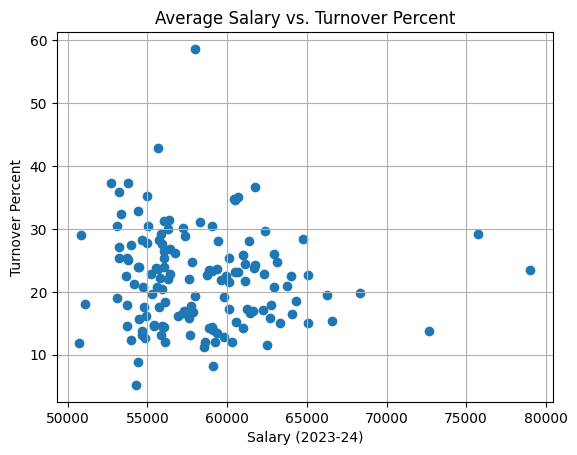

In [938]:
plt.scatter(result_turnover['average_salary_23-24'], result_turnover['turnover_percent'])
plt.title('Average Salary vs. Turnover Percent')
plt.xlabel('Salary (2023-24)')
plt.ylabel('Turnover Percent')
plt.grid(True)
plt.show()

Combined Salary with Managing Student Behavior.


In [939]:
query = """
SELECT 
    s.*,
    c."impact_measure",
    c."impact_value"
FROM salary s
JOIN conditions c
    ON s."dist_no" = c."district_number"
WHERE c."school_name" = 'All Schools' AND c."impact_measure" = 'Managing Student Behavior'
"""
result_behavior = pd.read_sql_query(query, conn)
result_behavior.head(10)


,dist_no,district_name,average_salary_23-24,impact_measure,impact_value
0,001,ADAIR,56572.35,Managing Student Behavior,55
1,005,ALLEN,58546.96,Managing Student Behavior,46
2,006,ANCHORAGE,81282.49,Managing Student Behavior,82
3,011,ANDERSON,58451.95,Managing Student Behavior,52
4,012,ASHLAND,56241.45,Managing Student Behavior,64
5,013,AUGUSTA,55779.79,Managing Student Behavior,78
6,015,BALLARD,57308.89,Managing Student Behavior,70
7,016,BARBOURVILLE,55957.51,Managing Student Behavior,75
8,017,BARDSTOWN,69103.89,Managing Student Behavior,67
9,021,BARREN,61690.39,Managing Student Behavior,68


In [940]:
result_behavior.to_csv("combined_salary_behavior.csv", index=False)

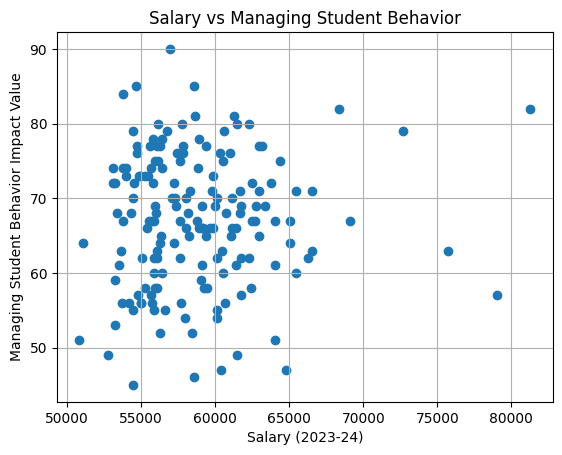

In [941]:
plt.scatter(result_behavior['average_salary_23-24'], result_behavior['impact_value'])
plt.title('Salary vs Managing Student Behavior')
plt.xlabel('Salary (2023-24)')
plt.ylabel('Managing Student Behavior Impact Value')
plt.grid(True)
plt.show()

Combined Salary with School Leadership

In [942]:
query = """
SELECT 
    s.*,
    c."impact_measure",
    c."impact_value"
FROM salary s
JOIN conditions c
    ON s."dist_no" = c."district_number"
WHERE c."school_name" = 'All Schools' AND c."impact_measure" = 'School Leadership'
"""
result_leadership = pd.read_sql_query(query, conn)
result_leadership.head(10)

,dist_no,district_name,average_salary_23-24,impact_measure,impact_value
0,001,ADAIR,56572.35,School Leadership,53
1,005,ALLEN,58546.96,School Leadership,49
2,006,ANCHORAGE,81282.49,School Leadership,70
3,011,ANDERSON,58451.95,School Leadership,51
4,012,ASHLAND,56241.45,School Leadership,68
5,013,AUGUSTA,55779.79,School Leadership,85
6,015,BALLARD,57308.89,School Leadership,69
7,016,BARBOURVILLE,55957.51,School Leadership,76
8,017,BARDSTOWN,69103.89,School Leadership,67
9,021,BARREN,61690.39,School Leadership,75


In [943]:
result_leadership.to_csv("combined_salary_leadership.csv", index=False)

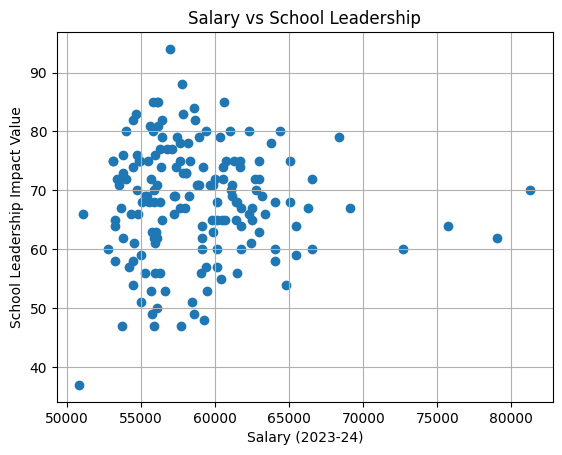

In [944]:
plt.scatter(result_leadership['average_salary_23-24'], result_leadership['impact_value'])
plt.title('Salary vs School Leadership')
plt.xlabel('Salary (2023-24)')
plt.ylabel('School Leadership Impact Value')
plt.grid(True)
plt.show()

Combined Salary with School Climate

In [945]:
query = """
SELECT 
    s.*,
    c."impact_measure",
    c."impact_value"
FROM salary s
JOIN conditions c
    ON s."dist_no" = c."district_number"
WHERE c."school_name" = 'All Schools' AND c."impact_measure" = 'School Climate'
"""
result_climate = pd.read_sql_query(query, conn)
result_climate.head(10)

,dist_no,district_name,average_salary_23-24,impact_measure,impact_value
0,001,ADAIR,56572.35,School Climate,45
1,005,ALLEN,58546.96,School Climate,41
2,006,ANCHORAGE,81282.49,School Climate,76
3,011,ANDERSON,58451.95,School Climate,49
4,012,ASHLAND,56241.45,School Climate,66
5,013,AUGUSTA,55779.79,School Climate,80
6,015,BALLARD,57308.89,School Climate,68
7,016,BARBOURVILLE,55957.51,School Climate,81
8,017,BARDSTOWN,69103.89,School Climate,65
9,021,BARREN,61690.39,School Climate,69


In [946]:
result_climate.to_csv("combined_salary_climate.csv", index=False)

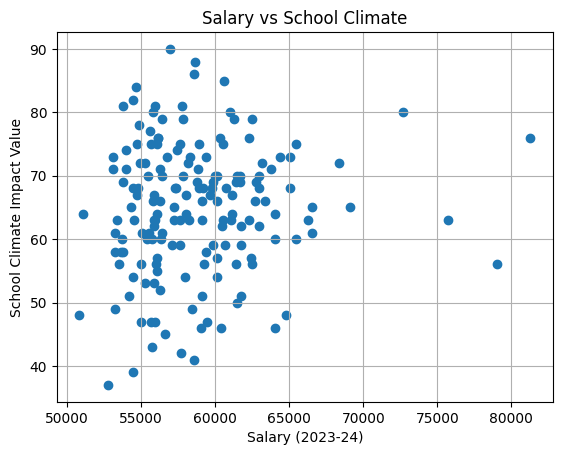

In [947]:
plt.scatter(result_climate['average_salary_23-24'], result_climate['impact_value'])
plt.title('Salary vs School Climate')
plt.xlabel('Salary (2023-24)')
plt.ylabel('School Climate Impact Value')
plt.grid(True)
plt.show()

Combined Salary with Average Satisfaction score, the average of all 3 working conditions.

In [948]:
query = """
SELECT 
    s.*,
    a."average_impact_value"
FROM salary s
JOIN average_satisfaction a
    ON s."dist_no" = a."district_number"
"""
result_average_satisfaction = pd.read_sql_query(query, conn)
result_average_satisfaction.head(10)

,dist_no,district_name,average_salary_23-24,average_impact_value
0,001,ADAIR,56572.35,51.40
1,005,ALLEN,58546.96,45.60
2,006,ANCHORAGE,81282.49,76.00
3,011,ANDERSON,58451.95,50.95
4,012,ASHLAND,56241.45,66.59
5,013,AUGUSTA,55779.79,81.00
6,015,BALLARD,57308.89,69.40
7,016,BARBOURVILLE,55957.51,77.33
8,017,BARDSTOWN,69103.89,66.47
9,021,BARREN,61690.39,71.00


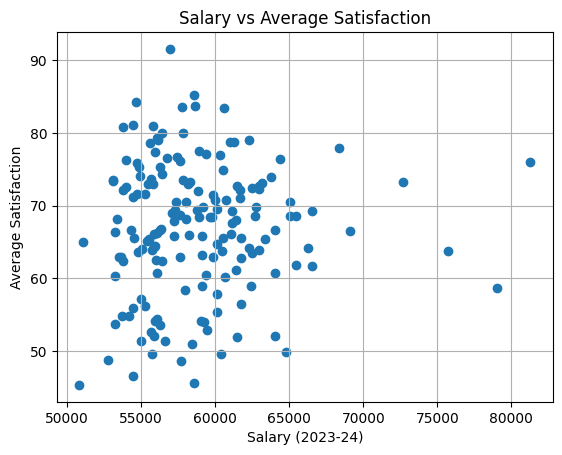

In [949]:
plt.scatter(result_average_satisfaction['average_salary_23-24'], result_average_satisfaction['average_impact_value'])
plt.title('Salary vs Average Satisfaction')
plt.xlabel('Salary (2023-24)')
plt.ylabel('Average Satisfaction')
plt.grid(True)
plt.show()


In [ ]:
query = """
SELECT 
    a.*,
    t."turnover_percent"
FROM average_satisfaction a
JOIN turnover t
    ON a."district_number" = t."district_number"
WHERE t."school_name" = 'All Schools'
"""
result_turnover_vs_satisfaction= pd.read_sql_query(query, conn)
result_turnover_vs_satisfaction.head(20)

,district_number,district_name,average_impact_value,turnover_percent
0,999,All Districts,67.00,22.5
1,1,Adair County,51.40,19.2
2,5,Allen County,45.60,19.9
3,6,Anchorage Independent,76.00,5.4
4,11,Anderson County,50.95,22.1
5,12,Ashland Independent,66.59,31.7
6,13,Augusta Independent,81.00,20.8
7,15,Ballard County,69.40,15.9
8,16,Barbourville Independent,77.33,6.4
9,17,Bardstown Independent,66.47,21.7


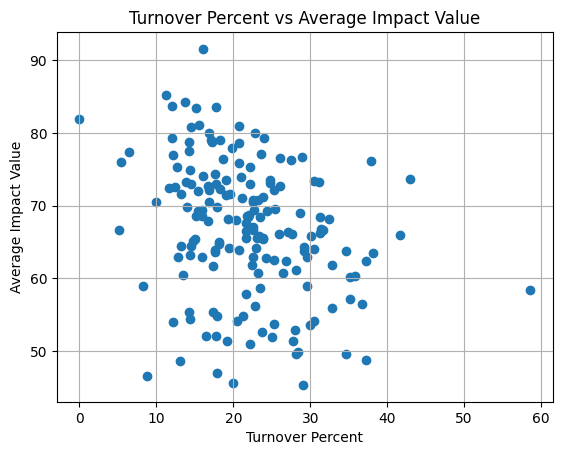

In [951]:
plt.scatter(result_turnover_vs_satisfaction['turnover_percent'], result_turnover_vs_satisfaction['average_impact_value'])
plt.title('Turnover Percent vs Average Impact Value')
plt.xlabel('Turnover Percent')
plt.ylabel('Average Impact Value')
plt.grid(True)
plt.show()

In [952]:
query = """
SELECT 
    c.*,
    t."turnover_percent"
FROM combined c
JOIN turnover t
    ON c."district_number" = t."district_number"
WHERE t."school_name" = 'All Schools'
"""
result_turnover_vs_combined= pd.read_sql_query(query, conn)
result_turnover_vs_combined.head(20)

,district_number,district_name,average_impact_value,turnover_percent
0,5,Allen County,45.60,19.9
1,11,Anderson County,50.95,22.1
2,13,Augusta Independent,81.00,20.8
3,113,Caverna Independent,49.58,34.7
4,131,Clinton County,46.50,8.8
5,132,Cloverport Independent,45.33,29.0
6,146,Dawson Springs Independent,81.11,15.6
7,151,Edmonson County,80.78,14.5
8,246,Hazard Independent,91.58,16.1
9,272,Jackson Independent,83.67,12.0


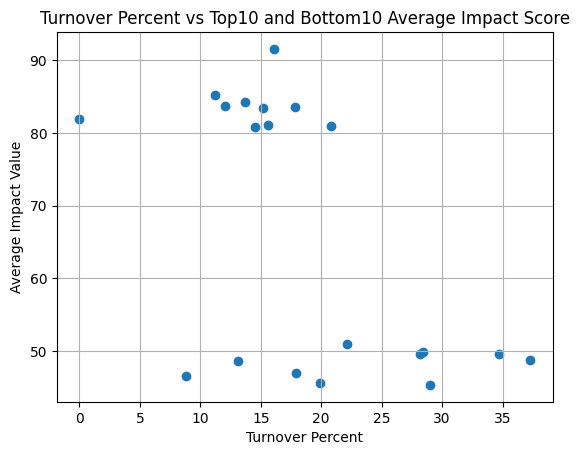

In [953]:
plt.scatter(result_turnover_vs_combined['turnover_percent'], result_turnover_vs_combined['average_impact_value'])
plt.title('Turnover Percent vs Top10 and Bottom10 Average Impact Score')
plt.xlabel('Turnover Percent')
plt.ylabel('Average Impact Value')
plt.grid(True)
plt.show()

In [967]:
query = """
SELECT
    s.dist_no,
    s.district_name,
    s."average_salary_23-24",
    t.turnover_percent,
    sat.average_impact_value
FROM salary s
LEFT JOIN turnover t
    ON CAST(s.dist_no AS TEXT) = CAST(t.district_number AS TEXT)
    AND LOWER(t.school_name) = 'all schools'
LEFT JOIN average_satisfaction sat
    ON CAST(s.dist_no AS TEXT) = CAST(sat.district_number AS TEXT)
"""
result_all= pd.read_sql_query(query, conn)
result_all.head(20)

,dist_no,district_name,average_salary_23-24,turnover_percent,average_impact_value
0,001,ADAIR,56572.35,NaN,NaN
1,005,ALLEN,58546.96,NaN,NaN
2,006,ANCHORAGE,81282.49,NaN,NaN
3,011,ANDERSON,58451.95,NaN,NaN
4,012,ASHLAND,56241.45,NaN,NaN
5,013,AUGUSTA,55779.79,NaN,NaN
6,015,BALLARD,57308.89,NaN,NaN
7,016,BARBOURVILLE,55957.51,NaN,NaN
8,017,BARDSTOWN,69103.89,NaN,NaN
9,021,BARREN,61690.39,NaN,NaN
